# Data Question 2


## How is queue time impacted by RAM requested? How is it impacted by wall time requested?

## Are there any nodes that fail more than the other ones?
    Thoughts on why they fail

## Identify problematic users
Those people who submit greater than 500 jobs, with each less than 5 minutes within 4 hours

In [1]:
#import libraries 
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from datetime import datetime
import numpy as np

%matplotlib inline

In [2]:
accre_df = pd.read_csv('Data/july-2017-thru-june-2018.txt', sep = '|')
accre_df.head()

/Users/andrewmarsee/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,JobID,JobIDRaw,Cluster,Partition,Account,Group,GID,User,UID,Submit,...,State,NNodes,NCPUS,ReqCPUS,ReqMem,ReqGRES,ReqTRES,Timelimit,NodeList,JobName
0,15806649,15806649,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02T00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1085,WOODWARD_TCP-x-228324-x-228324-x-301-x-Multi_A...
1,15806664,15806664,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02T00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1099,WOODWARD_TCP-x-115174-x-115174-x-301-x-Multi_A...
2,15806670,15806670,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02T00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1126,WOODWARD_TCP-x-215607-x-215607-x-301-x-Multi_A...
3,15806671,15806671,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02T00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp230,WOODWARD_TCP-x-116214-x-116214-x-1701-x-Multi_...
4,15811617,15811617,accre,production,cms_samtest,cms_samtest,59297,uscms010,NaN,2017-07-01T05:00:00,...,COMPLETED,1,1,1,4000Mn,NaN,"cpu=1,mem=4000M,node=1",2-00:00:00,vmp1242,bl_aa7c22e04f21


In [3]:
accre_df.head(10)

,JobID,JobIDRaw,Cluster,Partition,Account,Group,GID,User,UID,Submit,...,State,NNodes,NCPUS,ReqCPUS,ReqMem,ReqGRES,ReqTRES,Timelimit,NodeList,JobName
0,15806649,15806649,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02T00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1085,WOODWARD_TCP-x-228324-x-228324-x-301-x-Multi_A...
1,15806664,15806664,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02T00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1099,WOODWARD_TCP-x-115174-x-115174-x-301-x-Multi_A...
2,15806670,15806670,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02T00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1126,WOODWARD_TCP-x-215607-x-215607-x-301-x-Multi_A...
3,15806671,15806671,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02T00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp230,WOODWARD_TCP-x-116214-x-116214-x-1701-x-Multi_...
4,15811617,15811617,accre,production,cms_samtest,cms_samtest,59297,uscms010,NaN,2017-07-01T05:00:00,...,COMPLETED,1,1,1,4000Mn,NaN,"cpu=1,mem=4000M,node=1",2-00:00:00,vmp1242,bl_aa7c22e04f21
5,15811618,15811618,accre,production,cms_stage2,cms_stage1,59298,autocms,9209.0,2017-07-01T05:00:01,...,COMPLETED,1,1,1,2Gc,NaN,"cpu=1,mem=2G,node=1",12:00:00,vmp1063,skim_test
6,15811619,15811619,accre,production,cms_stage2,cms,31000,tuos,126986.0,2017-07-01T05:00:02,...,COMPLETED,1,1,1,2Gc,NaN,"cpu=1,mem=2G,node=1",12:00:00,vmp1062,skim_test
7,15811621,15811621,accre,production,cms_samtest,cms_samtest,59297,uscms010,NaN,2017-07-01T05:00:22,...,COMPLETED,1,1,1,4000Mn,NaN,"cpu=1,mem=4000M,node=1",2-00:00:00,vmp1242,bl_33ee450ebdc4
8,15811624,15811624,accre,production,cms_stage2,cms_stage1,59298,autocms,9209.0,2017-07-01T05:01:01,...,COMPLETED,1,1,1,2Gc,NaN,"cpu=1,mem=2G,node=1",12:00:00,vmp670,skim_test
9,15811625,15811625,accre,production,cms_stage2,cms,31000,tuos,126986.0,2017-07-01T05:01:02,...,COMPLETED,1,1,1,2Gc,NaN,"cpu=1,mem=2G,node=1",12:00:00,vmp1078,skim_test


In [4]:
accre_df.tail(10)

,JobID,JobIDRaw,Cluster,Partition,Account,Group,GID,User,UID,Submit,...,State,NNodes,NCPUS,ReqCPUS,ReqMem,ReqGRES,ReqTRES,Timelimit,NodeList,JobName
12499379,28331346,28331346,accre,production,cms_stage3,cms,31000,janjamrk,171357.0,2018-06-30T23:54:17,...,COMPLETED,1,1,1,4Gc,NaN,"cpu=1,mem=4G,node=1",01:00:00,vmp1331,2018-06-30-040817_1
12499380,28331347,28331347,accre,production,cms_stage3,cms,31000,janjamrk,171357.0,2018-06-30T23:54:17,...,COMPLETED,1,1,1,4Gc,NaN,"cpu=1,mem=4G,node=1",01:00:00,vmp1336,2018-06-30-040817_2
12499381,28331348,28331348,accre,production,cms_stage3,cms,31000,janjamrk,171357.0,2018-06-30T23:54:18,...,COMPLETED,1,1,1,4Gc,NaN,"cpu=1,mem=4G,node=1",01:00:00,vmp1347,2018-06-30-040817_3
12499382,28331349,28331349,accre,production,cms_stage3,cms,31000,janjamrk,171357.0,2018-06-30T23:54:18,...,FAILED,1,1,1,4Gc,NaN,"cpu=1,mem=4G,node=1",01:00:00,vmp1385,2018-06-30-040817_4
12499383,28331350,28331350,accre,production,cms_stage3,cms,31000,janjamrk,171357.0,2018-06-30T23:54:20,...,FAILED,1,1,1,4Gc,NaN,"cpu=1,mem=4G,node=1",01:00:00,vmp1406,2018-06-30-040817_5
12499384,28331351,28331351,accre,production,cms_stage3,cms,31000,janjamrk,171357.0,2018-06-30T23:54:21,...,FAILED,1,1,1,4Gc,NaN,"cpu=1,mem=4G,node=1",01:00:00,vmp1314,2018-06-30-040817_6
12499385,28331352,28331352,accre,production,cms_stage3,cms,31000,janjamrk,171357.0,2018-06-30T23:54:22,...,FAILED,1,1,1,4Gc,NaN,"cpu=1,mem=4G,node=1",01:00:00,vmp1315,2018-06-30-040817_7
12499386,28331353,28331353,accre,production,cms_stage3,cms,31000,janjamrk,171357.0,2018-06-30T23:54:22,...,FAILED,1,1,1,4Gc,NaN,"cpu=1,mem=4G,node=1",01:00:00,vmp1315,2018-06-30-040817_8
12499387,28331356,28331356,accre,production,cms_stage2,cms,31000,autocms,9209.0,2018-06-30T23:55:01,...,COMPLETED,1,1,1,2Gc,NaN,"cpu=1,mem=2G,node=1",12:00:00,vmp1065,skim_test
12499388,28331357,28331357,accre,production,cms_samtest,cms_samtest,59297,uscms010,NaN,2018-06-30T23:55:31,...,COMPLETED,1,1,1,4000Mn,NaN,"cpu=1,mem=4000M,node=1",2-00:00:00,vmp1298,bl_0e20773d4484


In [5]:
print(accre_df.columns)
print(accre_df.shape)

Index(['JobID', 'JobIDRaw', 'Cluster', 'Partition', 'Account', 'Group', 'GID',
       'User', 'UID', 'Submit', 'Eligible', 'Start', 'End', 'Elapsed',
       'ExitCode', 'State', 'NNodes', 'NCPUS', 'ReqCPUS', 'ReqMem', 'ReqGRES',
       'ReqTRES', 'Timelimit', 'NodeList', 'JobName'],
      dtype='object')
(12499389, 25)


## Queue time = Start time - submit time

Queue time is the amount of time that a user has to wait until the job runs

## We want to see how requested RAM (reqMem) and requested wall time (Timelimit) affect the Queue time

In [6]:
# Checking if elapsed time is the same as difference between start and end
print(accre_df[['Start', 'End', 'Elapsed']].head(30))

                  Start                  End     Elapsed
0   2017-07-03T02:13:59  2017-07-04T03:19:20  1-01:05:21
1   2017-07-03T02:20:08  2017-07-04T02:11:55    23:51:47
2   2017-07-03T02:41:13  2017-07-04T04:41:04  1-01:59:51
3   2017-07-03T02:51:53  2017-07-04T10:54:13  1-08:02:20
4   2017-07-01T05:00:01  2017-07-01T05:00:11    00:00:10
5   2017-07-01T05:00:04  2017-07-01T05:03:22    00:03:18
6   2017-07-01T05:00:04  2017-07-01T05:02:07    00:02:03
7   2017-07-01T05:00:23  2017-07-01T05:00:33    00:00:10
8   2017-07-01T05:01:02  2017-07-01T05:05:49    00:04:47
9   2017-07-01T05:01:05  2017-07-01T05:04:17    00:03:12
10  2017-07-01T05:03:05  2017-07-05T15:03:31  4-10:00:26
11  2017-07-01T05:24:23  2017-07-04T23:31:41  3-18:07:18
12  2017-07-01T05:38:05  2017-07-05T08:57:48  4-03:19:43
13  2017-07-01T06:03:05  2017-07-05T15:47:51  4-09:44:46
14  2017-07-01T06:26:59  2017-07-05T09:24:54  4-02:57:55
15  2017-07-01T06:41:30  2017-07-06T02:26:56  4-19:45:26
16  2017-07-01T07:03:05  2017-0

In [7]:
# Get the data types and size of each of the columns
accre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12499389 entries, 0 to 12499388
Data columns (total 25 columns):
JobID        object
JobIDRaw     int64
Cluster      object
Partition    object
Account      object
Group        object
GID          int64
User         object
UID          float64
Submit       object
Eligible     object
Start        object
End          object
Elapsed      object
ExitCode     object
State        object
NNodes       int64
NCPUS        int64
ReqCPUS      int64
ReqMem       object
ReqGRES      object
ReqTRES      object
Timelimit    object
NodeList     object
JobName      object
dtypes: float64(1), int64(5), object(19)
memory usage: 2.3+ GB


## Submit and start times are both strings, so we need to convert those to a form that we can use

In [8]:
# Checking the components of the Eligible column
accre_df.Eligible.head()


0    2017-07-02T00:42:59
1    2017-07-02T00:42:59
2    2017-07-02T00:42:59
3    2017-07-02T00:42:59
4    2017-07-01T05:00:00
Name: Eligible, dtype: object

In [9]:
# Checking the components of the Submit column
accre_df.Submit.head()

0    2017-07-02T00:40:58
1    2017-07-02T00:40:58
2    2017-07-02T00:40:58
3    2017-07-02T00:40:58
4    2017-07-01T05:00:00
Name: Submit, dtype: object

## We want to get the Timelimit column in a standard format

Currently the format is d-h:m:s
However, this format breaks down if the requested time is less than 1 day. This makes the format h:m:s
Need to standardize the format so that it can be changed to datetime format

In [10]:
print(type(accre_df['Timelimit'].iloc[5]))

<class 'str'>


In [12]:
print(type(accre_df['Timelimit'].iloc[3]))

<class 'str'>


In [13]:
# Change the submit and start column to a date time 64 data type
accre_df['Submit'] = pd.to_datetime(accre_df['Submit'], format="%Y/%m/%d")
accre_df['Start'] = pd.to_datetime(accre_df['Start'], format="%Y/%m/%d")


In [14]:
accre_df.Start.head()

0   2017-07-03 02:13:59
1   2017-07-03 02:20:08
2   2017-07-03 02:41:13
3   2017-07-03 02:51:53
4   2017-07-01 05:00:01
Name: Start, dtype: datetime64[ns]

## Subtract the submit time from the queue time to find the queue time

In [15]:
accre_df['queue_time'] = accre_df['Start'] - accre_df['Submit']
print(accre_df.queue_time.head(30))

0    1 days 01:33:01
1    1 days 01:39:10
2    1 days 02:00:15
3    1 days 02:10:55
4    0 days 00:00:01
5    0 days 00:00:03
6    0 days 00:00:02
7    0 days 00:00:01
8    0 days 00:00:01
9    0 days 00:00:03
10   0 days 00:01:43
11   0 days 00:23:01
12   0 days 00:36:42
13   0 days 01:01:42
14   0 days 01:25:36
15   0 days 01:40:07
16   0 days 02:01:42
17   0 days 03:01:45
18   0 days 03:41:41
19   0 days 03:51:59
20   0 days 04:00:01
21   0 days 05:30:14
22   0 days 05:36:41
23   0 days 05:46:40
24   0 days 05:58:32
25   0 days 07:26:40
26   0 days 07:35:36
27   0 days 07:47:14
28   0 days 08:26:39
29   0 days 08:46:39
Name: queue_time, dtype: timedelta64[ns]


In [16]:
accre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12499389 entries, 0 to 12499388
Data columns (total 26 columns):
JobID         object
JobIDRaw      int64
Cluster       object
Partition     object
Account       object
Group         object
GID           int64
User          object
UID           float64
Submit        datetime64[ns]
Eligible      object
Start         datetime64[ns]
End           object
Elapsed       object
ExitCode      object
State         object
NNodes        int64
NCPUS         int64
ReqCPUS       int64
ReqMem        object
ReqGRES       object
ReqTRES       object
Timelimit     object
NodeList      object
JobName       object
queue_time    timedelta64[ns]
dtypes: datetime64[ns](2), float64(1), int64(5), object(17), timedelta64[ns](1)
memory usage: 2.4+ GB


## Convert the timedelta64 from the queue_time column to seconds (float) for further processing

In [17]:
# Convert the queue time to a floating point number containing the seconds it took to start
accre_df['queue_time'] = accre_df.queue_time.dt.total_seconds()
print(accre_df['queue_time'].head(10))

0    91981.0
1    92350.0
2    93615.0
3    94255.0
4        1.0
5        3.0
6        2.0
7        1.0
8        1.0
9        3.0
Name: queue_time, dtype: float64


## Convert to minutes

In [117]:
accre_df['queue_time'] = accre_df['queue_time'] /60
print(accre_df['queue_time'].head(10))

0    1533.016667
1    1539.166667
2    1560.250000
3    1570.916667
4       0.016667
5       0.050000
6       0.033333
7       0.016667
8       0.016667
9       0.050000
Name: queue_time, dtype: float64


## Now we have the queue time in a floating point number
## Next we need to get the requested memory and requested wall time in a usable format

## We need to get the Requested Time ('Timelimit') in a usable format

In [101]:
# Get Days, hours, minutes, and seconds
req_days = pd.to_numeric(accre_df['Timelimit'].str[:-9]).fillna(value=0)
req_hours = pd.to_numeric(accre_df['Timelimit'].str[-8:-6])
req_minutes = pd.to_numeric(accre_df['Timelimit'].str[-5:-3])
req_secs = pd.to_numeric(accre_df['Timelimit'].str[-2:])
# Apply formula to get total time in minutes
accre_df['req_time'] = (req_days*1440)+(req_hours*60)+(req_minutes)+(req_secs/60)

print(accre_df['req_time'].head(20))

0     13200.0
1     13200.0
2     13200.0
3     13200.0
4      2880.0
5       720.0
6       720.0
7      2880.0
8       720.0
9       720.0
10     7680.0
11     7680.0
12     7680.0
13     7680.0
14     7680.0
15     7680.0
16     7680.0
17     7680.0
18     7680.0
19     7680.0
Name: req_time, dtype: float64


In [144]:
req_time_group=accre_df[['req_time', 'JobIDRaw']].groupby('req_time').agg('count').sort_values(by ='JobIDRaw', ascending = False).head(30)
req_time_group = req_time_group.reset_index()
req_time_group.columns = [['req_time','JobCount']]
req_time_group['JobPct'] = req_time_group['JobCount'] / len(accre_df.index) * 100
print(req_time_group.head(15))

   req_time JobCount     JobPct
0    2880.0  4826451  38.613495
1     720.0   898436   7.187839
2     120.0   869582   6.956996
3     360.0   562836   4.502908
4     300.0   497884   3.983267
5    1200.0   435674   3.485562
6      30.0   405551   3.244567
7      60.0   394684   3.157626
8     240.0   393654   3.149386
9      45.0   316562   2.532620
10   1440.0   269345   2.154865
11    600.0   224589   1.796800
12    180.0   187525   1.500273
13     15.0   174400   1.395268
14  20160.0   166342   1.330801


## We can see that the most popular amount of time requested is 2 Days (2880 minutes)

## Next is 12 hours, followed by 2 hours and 6 hours

In [145]:
# Counting the number of NaN values in the req_time column
print('The number of NaN values is ' + str(accre_df['req_time'].isnull().sum()))

The number of NaN values is 108668


## There are 108,668 rows with NaN in the req_time column

## Now we have the requested wall time in a column called req_time

## Creating groups based on how the users requested memory

## Gc = GB per core
## Mc = MB per core
## Gn = GB per node
## Mn = MB per node

In [146]:
# Requested memory is in the column ReqMem
# Number at beginning signifies amount of RAM in either MB or GB, depending if the letter is M or G
# The amount of RAM is per core or node, depending whether the last letter is c or n
gig_ind_percore = accre_df['ReqMem'].str[-2:] == 'Gc'
meg_ind_percore = accre_df['ReqMem'].str[-2:] == 'Mc'
gig_ind_pernode = accre_df['ReqMem'].str[-2:] == 'Gn'
meg_ind_pernode = accre_df['ReqMem'].str[-2:] == 'Mn'
# Checking an example of the bool mask
print(gig_ind_percore.tail(20))


12499369     True
12499370     True
12499371     True
12499372     True
12499373     True
12499374     True
12499375     True
12499376     True
12499377     True
12499378     True
12499379     True
12499380     True
12499381     True
12499382     True
12499383     True
12499384     True
12499385     True
12499386     True
12499387     True
12499388    False
Name: ReqMem, dtype: bool


## Convert the requested memory to floating point values

In [147]:
# Taking everything up to the second to last character because that will be the amount of memory requested
accre_df['mem_int'] = accre_df['ReqMem'].str[:-2]
accre_df['mem_int'] = pd.to_numeric(accre_df.mem_int)
print(accre_df.mem_int.head(20))

0       12.0
1       12.0
2       12.0
3       12.0
4     4000.0
5        2.0
6        2.0
7     4000.0
8        2.0
9        2.0
10      10.0
11      10.0
12      10.0
13      10.0
14      10.0
15      10.0
16      10.0
17      10.0
18      10.0
19      10.0
Name: mem_int, dtype: float64


## Convert all of the requested memory to GB

This makes it a little easier to handle if everything is in the same unit

In [148]:
# Divide the "Mc" values by 1000 to get to GB
accre_df.loc[meg_ind_percore, 'mem_int'] = accre_df['mem_int'] / 1000
# Divide the "Mn" values by 1000 to get to GB
accre_df.loc[meg_ind_pernode, 'mem_int'] = accre_df['mem_int'] / 1000
print(accre_df.mem_int.head(20))

0     12.0
1     12.0
2     12.0
3     12.0
4      4.0
5      2.0
6      2.0
7      4.0
8      2.0
9      2.0
10    10.0
11    10.0
12    10.0
13    10.0
14    10.0
15    10.0
16    10.0
17    10.0
18    10.0
19    10.0
Name: mem_int, dtype: float64


## Sorting the values to see what the most memory requested was

In [149]:
print(accre_df.mem_int.sort_values(ascending = False).head(30))

8673264     100000.0
5062374       2000.0
5062383       2000.0
5062390       2000.0
5062375       2000.0
5062376       2000.0
5062377       2000.0
5062378       2000.0
5062379       2000.0
5062380       2000.0
5062381       2000.0
5062382       2000.0
5062384       2000.0
5062372       2000.0
5062385       2000.0
5062386       2000.0
5062387       2000.0
5062388       2000.0
5062389       2000.0
5062394       2000.0
5062393       2000.0
5062392       2000.0
5062373       2000.0
5062391       2000.0
5062371       2000.0
5062369       2000.0
5062370       2000.0
11916731      1000.0
8675470       1000.0
8675469       1000.0
Name: mem_int, dtype: float64


## We can see that some people requested a lot of memory. The highest amount was 100,000 GB!!

## Creating a new column with either an n or c to signify whether the data requested is per node or per core

In [150]:
# Creating a new column with n or c to signify if the requested memory is per core or per node
accre_df['core_node'] = accre_df['ReqMem'].str[-1]
print(accre_df.core_node.head(20))

0     n
1     n
2     n
3     n
4     n
5     c
6     c
7     n
8     c
9     c
10    n
11    n
12    n
13    n
14    n
15    n
16    n
17    n
18    n
19    n
Name: core_node, dtype: object


## Taking a look at the submission for 100,000 GB

In [109]:
print(accre_df.iloc[8673264,:])

JobID                            24502178
JobIDRaw                         24502178
Cluster                             accre
Partition                      production
Account                         p_vantage
Group                           p_vantage
GID                                 59347
User                             scholzmb
UID                                421502
Submit                2018-02-08 18:30:11
Eligible              2018-02-08T18:30:11
Start                 2018-02-08 18:30:11
End                   2018-02-08T18:30:11
Elapsed                          00:00:00
ExitCode                              1:0
State                              FAILED
NNodes                                  1
NCPUS                                   8
ReqCPUS                                 8
ReqMem                        100000000Mn
ReqGRES                               NaN
ReqTRES       cpu=8,mem=100000000M,node=1
Timelimit                     14-00:00:00
NodeList                    None a

## Their submission failed. Not a surprise considering they requested 100,000 GB 

# Now we have everything we need to visualize how requested time and memory affect queue time

## Can group by per core and also per node

## plot queue time vs requested mem
## plot queue time vs requested time

# First create smaller dataframe with just queue time, req_time, mem_int, core_node columns

In [208]:
q1_df = accre_df[['queue_time', 'req_time', 'mem_int', 'core_node', 'State', 'Account']]
print(q1_df.head(20))

     queue_time  req_time  mem_int core_node      State      Account
0   1533.016667   13200.0     12.0         n  COMPLETED      h_vuiis
1   1539.166667   13200.0     12.0         n  COMPLETED      h_vuiis
2   1560.250000   13200.0     12.0         n  COMPLETED      h_vuiis
3   1570.916667   13200.0     12.0         n  COMPLETED      h_vuiis
4      0.016667    2880.0      4.0         n  COMPLETED  cms_samtest
5      0.050000     720.0      2.0         c  COMPLETED   cms_stage2
6      0.033333     720.0      2.0         c  COMPLETED   cms_stage2
7      0.016667    2880.0      4.0         n  COMPLETED  cms_samtest
8      0.016667     720.0      2.0         c  COMPLETED   cms_stage2
9      0.050000     720.0      2.0         c  COMPLETED   cms_stage2
10     1.716667    7680.0     10.0         n  COMPLETED      h_vuiis
11    23.016667    7680.0     10.0         n  COMPLETED      h_vuiis
12    36.700000    7680.0     10.0         n  COMPLETED      h_vuiis
13    61.700000    7680.0     10.0

In [209]:
q1_df.loc[q1_df['State'] == 'FAILED'].head(20)

,queue_time,req_time,mem_int,core_node,State,Account
386,0.250000,2880.0,8.0,n,FAILED,segrest_group
441,0.383333,480.0,8.0,n,FAILED,segrest_group
453,0.900000,480.0,8.0,n,FAILED,segrest_group
537,0.950000,2880.0,8.0,n,FAILED,segrest_group
543,4.916667,600.0,10.0,n,FAILED,h_vuiis
544,4.916667,600.0,10.0,n,FAILED,h_vuiis
545,9.933333,600.0,10.0,n,FAILED,h_vuiis
546,9.916667,600.0,10.0,n,FAILED,h_vuiis
547,14.916667,600.0,10.0,n,FAILED,h_vuiis
548,14.916667,600.0,10.0,n,FAILED,h_vuiis


## randomly sample data for plotting

In [197]:
# create random sample of 3000 integers
indices = np.random.randint(0, len(q1_df), 3000)
q1_df_rand = q1_df.iloc[indices]
print(q1_df_rand.head(15))
print('The shape of the random subset is ' + str(q1_df_rand.shape))

           queue_time  req_time  mem_int core_node               State  \
8899432     96.716667    2880.0    5.000         n  CANCELLED by 29605   
1082364      0.016667    2880.0   28.000         n  CANCELLED by 29607   
1338797    882.916667     300.0   20.000         n           COMPLETED   
10460771   886.100000     240.0   40.000         n           COMPLETED   
10847653    36.050000      45.0   16.000         c           COMPLETED   
2929048      0.050000    1200.0   16.000         n           COMPLETED   
6781220     58.583333    2880.0   28.000         n  CANCELLED by 29607   
8026617   1460.883333      30.0    1.024         n           COMPLETED   
5826067      0.016667      51.0    1.000         n           COMPLETED   
237606       0.000000     720.0    2.000         c           COMPLETED   
3032489     59.533333    2880.0    5.000         n  CANCELLED by 29607   
117318     721.000000     480.0    8.000         n           COMPLETED   
8047885     14.533333      15.0    4.0

## Time to plot the data in the random subset

Text(0,0.5,'Queue Time (min)')

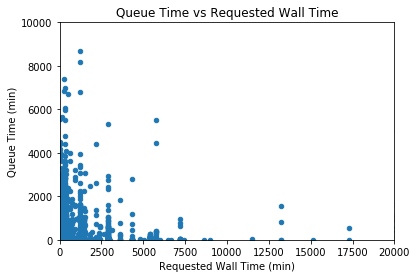

In [198]:
q1_df_rand.plot(kind='scatter', x='req_time', y='queue_time', xlim=(0,20000), ylim=(0,10000))
plt.title('Queue Time vs Requested Wall Time')
plt.xlabel('Requested Wall Time (min)')
plt.ylabel('Queue Time (min)')

Text(0,0.5,'Queue Time (min)')

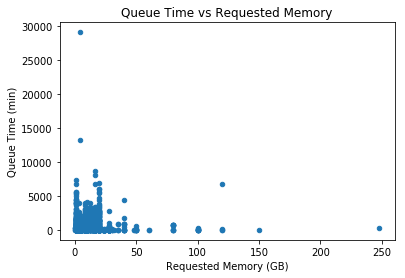

In [199]:
q1_df_rand.plot(kind='scatter', x='mem_int', y='queue_time')
plt.title('Queue Time vs Requested Memory')
plt.xlabel('Requested Memory (GB)')
plt.ylabel('Queue Time (min)')

## Create a histogram to view the distribution of Requested Wall Times

Text(0.5,0,'Requested Time (min)')

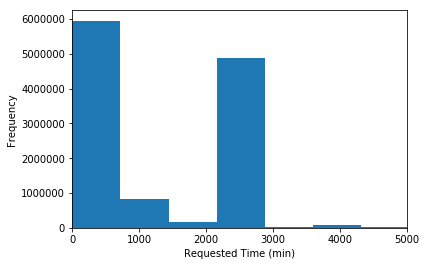

In [200]:
q1_df['req_time'].plot(kind='hist', bins = 60, xlim=(0,5000))
plt.xlabel('Requested Time (min)')

Text(0.5,1,'Amount of People Who Request Per Node or Core')

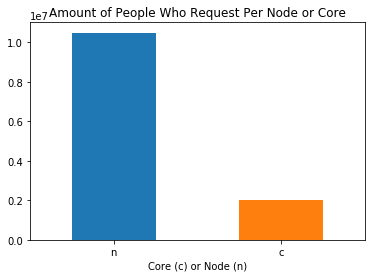

In [201]:
q1_df['core_node'].value_counts().plot(kind='bar', rot=0)
plt.xlabel('Core (c) or Node (n)')
plt.title('Amount of People Who Request Per Node or Core')

In [204]:

q1_med = q1_df_rand.groupby('core_node').median()
q1_med = q1_med.reset_index()
print(q1_med.head(30))
# q1_med.plot(kind='scatter', x='mem_int', y='queue_time')
# plt.title('Queue Time vs Requested Memory')
# plt.xlabel('Requested Memory (GB)')
# plt.ylabel('Queue Time (min)')

  core_node  queue_time  req_time  mem_int
0         c   17.333333     720.0      2.0
1         n   59.866667    1800.0      8.0
